### 1. 삼성전자 뉴스 기사제목 100개 가져오기

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=26&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start=11'

#### 1-1. 이중 반복문을 이용하여 기사제목 100개 출력하기

1. url 10개 반복 requests get
2. soup(html)에서 select한 a태그 10개 반복 title 파싱하여 출력



In [ ]:
url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=26&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start='

for i in range(10):
    start = i*10 + 1
    url += str(start) 
    print(url)

    resp = requests.get(url)
    # print(resp)

    soup = BeautifulSoup(resp.content, 'lxml')
    a_tags = soup.select('a.news_tit')
    # print(len(a_tags))

    for a_tag in a_tags:
        print(a_tag['title'])

#### 1-2. 기사제목 저장할 리스트 선언하여 append하여 저장하기

In [ ]:
url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=26&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start='

titles = []

In [ ]:
for i in range(10):
    start = i*10 + 1
    url += str(start) 
    print(url)

    resp = requests.get(url)
    # print(resp)

    soup = BeautifulSoup(resp.content, 'lxml')
    a_tags = soup.select('a.news_tit')
    # print(len(a_tags))
    
    for a_tag in a_tags:
        titles.append(a_tag['title'])
titles

#### 1-3. 긴 url 쿼리스트링 따로 분리하기

In [ ]:

titles = []

In [ ]:
for i in range(10):
    base_url = 'https://search.naver.com/search.naver?'

    start = i*10 + 1

    params = {
    'where' : 'news',
    'query' : '%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90',
    'start' : start
    }

    resp = requests.get(base_url, params)
    # print(resp)

    soup = BeautifulSoup(resp.content, 'lxml')
    a_tags = soup.select('a.news_tit')
    # print(len(a_tags))
    
    for a_tag in a_tags:
        titles.append(a_tag['title'])
titles

### 2. 요일별 웹툰 정보 가져오기

In [ ]:
import requests
from bs4 import BeautifulSoup

#### 2-1. 월요웹툰 전체 제목, 작가, 평점 가져와서 딕셔너리에 저장하기

In [ ]:
# 네이버 웹툰 전체 웹툰의 제목, 작가, 평점 -> csv 파일로 저장 
# 1단계 : 월요웹툰 전체 제목, 작가, 평점 가져와서 딕셔너리에 저장하기
dic_toon = {
    'title' : [],
    'author' : [],
    'rating' : []
}

url = 'https://comic.naver.com/webtoon/weekdayList?week=mon'

resp = requests.get(url)

soup = BeautifulSoup(resp.content, 'lxml')
# ul.img_list li dl dt a
tit_tags = soup.select('ul.img_list li dl dt a')
aut_tags = soup.select('ul.img_list dd.desc a')
rat_tags = soup.select('div.rating_type strong')
len(tit_tags), len(aut_tags) , len(rat_tags)

for i in range(len(tit_tags)):
    dic_toon['title'].append(tit_tags[i]['title'])
    dic_toon['author'].append(aut_tags[i].text)
    dic_toon['rating'].append(rat_tags[i].text)

for tit_tag, aut_tag, rat_tag in zip(tit_tags, aut_tags, rat_tags):
    dic_toon['title'].append(tit_tag['title'])
    dic_toon['author'].append(aut_tag.text)
    dic_toon['rating'].append(rat_tag.text)    

dic_toon

#### 2-2. 전체 웹툰 제목, 작가, 평점 딕셔너리에 저장 -> csv파일로 저장

In [ ]:
# 2단계 전체 웹툰 제목, 작가, 평점 딕셔너리에 저장 -> csv파일로 저장
dic_toon = {
    'title' : [],
    'author' : [],
    'rating' : []
}

weeks = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun', 'dailyplus']

for week in weeks:
    url = 'https://comic.naver.com/webtoon/weekdayList?week=' + week

    resp = requests.get(url)

    soup = BeautifulSoup(resp.content, 'lxml')
    # ul.img_list li dl dt a
    tit_tags = soup.select('ul.img_list li dl dt a')
    aut_tags = soup.select('ul.img_list dd.desc a')
    rat_tags = soup.select('div.rating_type strong')
    len(tit_tags), len(aut_tags) , len(rat_tags)

    for i in range(len(tit_tags)):
        dic_toon['title'].append(tit_tags[i]['title'])
        dic_toon['author'].append(aut_tags[i].text)
        dic_toon['rating'].append(rat_tags[i].text)

    for tit_tag, aut_tag, rat_tag in zip(tit_tags, aut_tags, rat_tags):
        dic_toon['title'].append(tit_tag['title'])
        dic_toon['author'].append(aut_tag.text)
        dic_toon['rating'].append(rat_tag.text)    

dic_toon

#### 2-3. url을 직접 수집해서 전체 웹툰 제목, 작가, 평점 딕셔너리에 저장 -> csv파일로 저장

In [ ]:
# 3단계 url을 직접 수집해서 전체 웹툰 제목, 작가, 평점 딕셔너리에 저장 -> csv파일로 저장
# weeks = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun', 'dailyplus']
import requests
from bs4 import BeautifulSoup

### 3-1단계 : url 수집
url = 'https://comic.naver.com/webtoon/weekday'

resp = requests.get(url)

soup = BeautifulSoup(resp.content, 'lxml')
a_tags = soup.select('ul.category_tab li a')[1:]

week_links = []

for a_tag in a_tags:
    week_links.append('https://comic.naver.com' + a_tag['href'])

### 3-2단계 : 2단계와 동일

tits, auts, rats = [], [], []

for url in week_links:
    resp = requests.get(url)

    soup = BeautifulSoup(resp.content, 'lxml')
    tit_tags = soup.select('ul.img_list li dl dt a')
    aut_tags = soup.select('ul.img_list li dl dd.desc a')
    rat_tags = soup.select('ul.img_list li dl dd div.rating_type strong')

    for i in range(len(tit_tags)):
        tits.append(tit_tags[i]['title'])
        auts.append(aut_tags[i].text)
        rats.append(rat_tags[i].text)

dic_toon = {
    'title' : tits,
    'author' : auts,
    'rating' : rats,
}



#### 2-4. 전체웹툰 제목, 작가, 평점 + 요일 csv파일로 저장

In [ ]:
# 4단계 전체웹툰 제목, 작가, 평점 + 요일 csv파일로 저장
week_links = []
url = 'https://comic.naver.com/webtoon/weekdayList?week=mon'

resp = requests.get(url)
soup = BeautifulSoup(resp.content, 'lxml')
a_tags = soup.select('ul.category_tab a')
for idx, a_tag in enumerate(a_tags):
    if idx:
        week_links.append('https://comic.naver.com' + a_tag['href'])
week_links

['https://comic.naver.com/webtoon/weekdayList?week=mon',
 'https://comic.naver.com/webtoon/weekdayList?week=tue',
 'https://comic.naver.com/webtoon/weekdayList?week=wed',
 'https://comic.naver.com/webtoon/weekdayList?week=thu',
 'https://comic.naver.com/webtoon/weekdayList?week=fri',
 'https://comic.naver.com/webtoon/weekdayList?week=sat',
 'https://comic.naver.com/webtoon/weekdayList?week=sun',
 'https://comic.naver.com/webtoon/weekdayList?week=dailyplus']

In [ ]:
len('https://comic.naver.com/webtoon/weekdayList?week=mon')

52

In [ ]:
for week_link in week_links:
    # print(week_link[49:])
    print(week_link.replace('https://comic.naver.com/webtoon/weekdayList?week=', ''))
    print(week_link.split('=')[1])

mon
tue
wed
thu
fri
sat
sun
dailyplus


In [ ]:
url = 'https://comic.naver.com/webtoon/weekdayList?week=mon'

resp = requests.get(url)

soup = BeautifulSoup(resp.content, 'lxml')
a_tags = soup.select('ul.category_tab a')[1:]

weeks = []
for a_tag in a_tags:
    weeks.append(a_tag.text[:-3])
weeks

['월', '화', '수', '목', '금', '토', '일', '매일']

In [ ]:


week_links = []

url = 'https://comic.naver.com/webtoon/weekday'

resp = requests.get(url)
soup = BeautifulSoup(resp.content,'lxml')
week_tags = soup.select('ul.category_tab a')

for week_tag in week_tags:
    week_links.append('https://comic.naver.com' + week_tag['href'])

week_links

['https://comic.naver.com/webtoon/weekday',
 'https://comic.naver.com/webtoon/weekdayList?week=mon',
 'https://comic.naver.com/webtoon/weekdayList?week=tue',
 'https://comic.naver.com/webtoon/weekdayList?week=wed',
 'https://comic.naver.com/webtoon/weekdayList?week=thu',
 'https://comic.naver.com/webtoon/weekdayList?week=fri',
 'https://comic.naver.com/webtoon/weekdayList?week=sat',
 'https://comic.naver.com/webtoon/weekdayList?week=sun',
 'https://comic.naver.com/webtoon/weekdayList?week=dailyplus']

In [ ]:
weeks

['월', '화', '수', '목', '금', '토', '일', '매일']

In [ ]:
week_links

['https://comic.naver.com/webtoon/weekday',
 'https://comic.naver.com/webtoon/weekdayList?week=mon',
 'https://comic.naver.com/webtoon/weekdayList?week=tue',
 'https://comic.naver.com/webtoon/weekdayList?week=wed',
 'https://comic.naver.com/webtoon/weekdayList?week=thu',
 'https://comic.naver.com/webtoon/weekdayList?week=fri',
 'https://comic.naver.com/webtoon/weekdayList?week=sat',
 'https://comic.naver.com/webtoon/weekdayList?week=sun',
 'https://comic.naver.com/webtoon/weekdayList?week=dailyplus']

In [ ]:
tits, auts, rats, w_days = [], [], [], [] 

for week, week_link in zip(weeks, week_links[1:]):
    resp = requests.get(week_link)
    soup = BeautifulSoup(resp.content, 'lxml')

    tit_tags = soup.select('ul.img_list li dl dt a')
    aut_tags = soup.select('ul.img_list dd.desc a')
    rat_tags = soup.select('ul.img_list div.rating_type strong')

    for tit_tag, aut_tag, rat_tag in zip(tit_tags, aut_tags, rat_tags):
        tits.append(tit_tag['title'])
        auts.append(aut_tag.text)
        rats.append(rat_tag.text)
        w_days.append(week)

dic_toon = {
    '제목' : tits,
    '작가' : auts,
    '평점' : rats,
    '요일' : w_days
}


import pandas as pd
df_toon = pd.DataFrame(dic_toon)
df_toon

,제목,작가,평점,요일
0,참교육,채용택 / 한가람,9.86,월
1,뷰티풀 군바리,설이 / 윤성원,9.81,월
2,퀘스트지상주의,박태준 만화회사,9.80,월
3,장씨세가 호위무사,김인호 / 조형근,9.93,월
4,윈드브레이커,조용석,9.84,월
...,...,...,...,...
672,사파리 로맨스,yoshua / 윤정,9.67,매일
673,투 두 리스트,RYO. / FLEWing,9.77,매일
674,사생활 체크,리기 / 와치,9.71,매일
675,비타운,요신 / 김선우,8.08,매일


In [ ]:
df_toon.to_csv('네이버웹툰정보.csv', index=False)

In [ ]:
naver_toons = pd.read_csv('네이버웹툰정보.csv', index_col='요일')
naver_toons

,제목,작가,평점
요일,,,
월,참교육,채용택 / 한가람,9.86
월,뷰티풀 군바리,설이 / 윤성원,9.81
월,퀘스트지상주의,박태준 만화회사,9.80
월,장씨세가 호위무사,김인호 / 조형근,9.93
월,윈드브레이커,조용석,9.84
...,...,...,...
매일,사파리 로맨스,yoshua / 윤정,9.67
매일,투 두 리스트,RYO. / FLEWing,9.77
매일,사생활 체크,리기 / 와치,9.71


In [ ]:
naver_toons = naver_toons.reset_index()
naver_toons

,요일,제목,작가,평점
0,월,참교육,채용택 / 한가람,9.86
1,월,뷰티풀 군바리,설이 / 윤성원,9.81
2,월,퀘스트지상주의,박태준 만화회사,9.80
3,월,장씨세가 호위무사,김인호 / 조형근,9.93
4,월,윈드브레이커,조용석,9.84
...,...,...,...,...
672,매일,사파리 로맨스,yoshua / 윤정,9.67
673,매일,투 두 리스트,RYO. / FLEWing,9.77
674,매일,사생활 체크,리기 / 와치,9.71
675,매일,비타운,요신 / 김선우,8.08


In [ ]:
naver_toons.dtypes

title      object
author     object
rating    float64
week       object
dtype: object

In [ ]:
# 평점은 float형으로 저장되도록 해서, 
# 평점의 평균, 중앙값을 출력해보세요.
naver_toons['rating'].mean(), naver_toons['rating'].median()

(9.748254211332313, 9.9)

In [ ]:
# 요일별 평점 평균, 중앙값 비교
# 요일이 같은 데이터끼리 묶어서 -> 각각 평균, 중앙값 계산
# 묶어서 (== groupby) A.groupby([b])
naver_toons.groupby(['요일']).mean()['평점'] # groupby 데이터프레임 -> 평균 계산 -> rating열 조회

요일
금     9.820779
매일    9.556583
목     9.728837
수     9.830602
월     9.848289
일     9.882179
토     9.839744
화     9.793797
Name: 평점, dtype: float64

In [ ]:
naver_toons.groupby(['week']).mean()[['rating']] # groupby 데이터프레임 -> 평균 계산 -> rating열을 포함한 데이터프레임
naver_toons.groupby(['week'])[['rating']].mean() # groupby 데이터프레임 -> rating열을 포함한 데이터프레임 조회 -> 평균 계산

,rating
week,
dailyplus,9.492277
fri,9.784605
mon,9.864103
sat,9.812750
sun,9.840130
thu,9.722500
tue,9.806533
wed,9.743537


### 장르별 웹툰 정보 가져오기

In [ ]:
import requests
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

In [ ]:
url = 'https://comic.naver.com/webtoon/genre'

resp = requests.get(url)

soup = BeautifulSoup(resp.content, 'lxml')
spot_tags = soup.select('ul.spot a')[3:]
len(spot_tags)

10

In [ ]:
genres = {}

for spot_tag in spot_tags:
    key = spot_tag.text

    href = spot_tag['href']
    value = href.split('=')[-1]

    genres[key] = value
genres

{'일상': 'daily',
 '개그': 'comic',
 '판타지': 'fantasy',
 '액션': 'action',
 '드라마': 'drama',
 '순정': 'pure',
 '감성': 'sensibility',
 '스릴러': 'thrill',
 '무협/사극': 'historical',
 '스포츠': 'sports'}

In [ ]:
for key, value in zip(genres.keys(), genres.values()):
    print(key, value)

일상 daily
개그 comic
판타지 fantasy
액션 action
드라마 drama
순정 pure
감성 sensibility
스릴러 thrill
무협/사극 historical
스포츠 sports


In [ ]:
tits, auts, rats, cats = [], [], [], []

for key, value in zip(genres.keys(), genres.values()):
    base_url = 'https://comic.naver.com/webtoon/genre?genre='
    url = base_url + value # value = daily -> comic -> fantasy ...

    resp = requests.get(url)

    soup = BeautifulSoup(resp.content, 'lxml')
    # tit, aut, rat
    tit_tags = soup.select('ul.img_list li dl dt a')
    aut_tags = soup.select('ul.img_list dd.desc a')
    rat_tags = soup.select('ul.img_list div.rating_type strong')

    for tit_tag, aut_tag, rat_tag in zip(tit_tags, aut_tags, rat_tags):
        tits.append(tit_tag['title'])
        auts.append(aut_tag.text)
        rats.append(rat_tag.text)
        cats.append(key) # key = 일상, 코믹, 판타지...

dic_toons = {'제목' : tits, '작가' : auts, '평점' : rats, '장르' : cats}

import pandas as pd

df_toons = pd.DataFrame(dic_toons)
df_toons

,제목,작가,평점,장르
0,대학원 탈출일지,요다,9.97,일상
1,먹는 인생,홍끼,9.96,일상
2,독립일기,자까,9.97,일상
3,"안녕, 나의 수집",하린,9.95,일상
4,윌유메리미,마인드C,9.92,일상
...,...,...,...,...
2016,군주,박산하,8.50,스포츠
2017,미드나잇 체이서,석재윤,9.60,스포츠
2018,불릿 6미리,김도근,9.89,스포츠
2019,리턴,송래현,9.85,스포츠


In [ ]:
df_toons.to_csv('장르별 네이버 웹툰.csv', index=False)

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
df_toons['rating'] = df_toons['rating'].astype('float')
df_toons.dtypes

title      object
author     object
rating    float64
genre      object
dtype: object

In [ ]:
# 장르별 평점 평균, 중앙값 비교
df_toons.groupby(['genre'])['rating'].mean()
df_toons.groupby(['genre']).median()['rating']

genre
감성       9.930
개그       9.900
드라마      9.910
무협/사극    9.910
순정       9.920
스릴러      9.870
스토리      9.900
스포츠      9.765
액션       9.830
에피소드     9.895
옴니버스     9.890
일상       9.890
판타지      9.910
Name: rating, dtype: float64

In [ ]:
# 장르별 평점 평균 내림차순 정렬
mean_by_genre = df_toons.groupby(['genre'])['rating'].mean()
mean_by_genre.sort_values(ascending=False, inplace=True)
mean_by_genre

genre
감성       9.897353
무협/사극    9.876970
순정       9.791850
옴니버스     9.784273
드라마      9.752833
스토리      9.728949
판타지      9.715457
스릴러      9.710844
일상       9.652533
개그       9.652132
에피소드     9.646701
스포츠      9.546250
액션       9.532649
Name: rating, dtype: float64

In [ ]:
mean_by_genre.sort_values?

In [ ]:
mean_by_genre = df_toons.groupby(['genre'])[['rating']].mean()
mean_by_genre.sort_values(by='rating', ascending=False, inplace=True)
mean_by_genre

,rating
genre,
감성,9.897353
무협/사극,9.876970
순정,9.791850
옴니버스,9.784273
드라마,9.752833
스토리,9.728949
판타지,9.715457
스릴러,9.710844
일상,9.652533


In [ ]:
!mkdir thumbs

### 웹툰 섬네일 가져오기

#### 이미지 크롤링의 이해  
html 안에 이미지는 없다. 이미지의 src만 있을 뿐.

- 1단계 : get - 이미지가 있는 페이지 가져오기
- 2단계 : select - 이미지 태그를 가져오기
		- 2-1단계 : 이미지 src값 가져오기
- 3단계 : get(이미지src) - 이미지 가져오기

In [ ]:
# url = 'https://shared-comic.pstatic.net/thumb/webtoon/758037/thumbnail/thumbnail_IMAG10_a2297504-4912-4c7e-a5a8-524d6fc77103.jpg'

# resp = requests.get(url)

# html = resp.content

In [ ]:
# 이미지 크롤링
img_srcs = []

url = 'https://comic.naver.com/webtoon/weekday'

resp = requests.get(url)

soup = BeautifulSoup(resp.content, 'lxml')
thumb_tags = soup.select('div.list_area.daily_all div.thumb a img')

for thumb_tag in thumb_tags:
    img_srcs.append(thumb_tag['src'])
img_srcs

['https://shared-comic.pstatic.net/thumb/webtoon/758037/thumbnail/thumbnail_IMAG21_15cb2611-34c0-4f02-a689-41d0b1016579.jpg',
 'https://shared-comic.pstatic.net/thumb/webtoon/648419/thumbnail/thumbnail_IMAG21_d9398229-cbfd-47dc-9208-0a6fb936f3a7.jpg',
 'https://shared-comic.pstatic.net/thumb/webtoon/783052/thumbnail/thumbnail_IMAG21_e14cbea7-8416-40e7-9aae-ccff970ac88f.jpg',
 'https://shared-comic.pstatic.net/thumb/webtoon/728750/thumbnail/thumbnail_IMAG21_351a0add-4304-46a3-8e28-c0ead996800a.jpg',
 'https://shared-comic.pstatic.net/thumb/webtoon/602910/thumbnail/thumbnail_IMAG21_e861f2cf-6157-4d33-8e02-7b4cbf0a8baf.jpg',
 'https://shared-comic.pstatic.net/thumb/webtoon/774863/thumbnail/thumbnail_IMAG21_3689684179498578529.jpg',
 'https://shared-comic.pstatic.net/thumb/webtoon/801035/thumbnail/thumbnail_IMAG21_01fd148f-edb2-4ada-9571-910981ec3376.jpg',
 'https://shared-comic.pstatic.net/thumb/webtoon/795297/thumbnail/thumbnail_IMAG21_4134925888999731505.jpg',
 'https://shared-comic.pst

In [ ]:
!mkdir thumb_image

In [ ]:
# img_src를 돌면서 이미지 가져오기
for idx, src in enumerate(img_srcs):
    resp = requests.get(src)

    with open('thumb_image/thumb_img_{:03}.jpg'.format(idx), 'wb') as f:
        f.write(resp.content)

KeyboardInterrupt: ignored

### kospi200 일별시세 가져오기

In [ ]:
# kospi200 일별시세 정보 60일치 가져오기
import requests 
from bs4 import BeautifulSoup

from tqdm.notebook import tqdm

#### iframe 페이지 크롤링의 이해
- iframe구조인지 파악(눈치채기) : 
    - 페이지가 바뀌는데, url이 안바뀐다. 
    - 페이지 구조상 안바뀌는게 맞는 것 같을 때
- html에서 iframe 태그 찾기 -> src 가져오기
- requests.get(iframe_src)

#### 일별시세 첫페이지 가져오기

In [ ]:
# 날짜 :    date
# 체결가:  price
# 전일비:  diff
# 등락률:  rate
# 거래량:  volume
# 거래대금:   amount

In [ ]:
# format기법으로 음수 추가
diff ='500'
diff = f'-{diff}'
diff

'-500'

In [ ]:
dates, prices, diffs, rates, volumes, amounts = [], [], [], [], [], []

url = 'https://finance.naver.com/sise/sise_index_day.naver?code=KPI200&page=1'

resp = requests.get(url)
resp

soup = BeautifulSoup(resp.content, 'lxml')
date_tags = soup.select('td.date')

num_tags = soup.select('td.number_1')
price_tags = num_tags[::4]
rate_tags = num_tags[1::4]
vol_tags = num_tags[2::4]
amnt_tags = num_tags[3::4]

diff_tags = soup.select('td.rate_down span.tah.p11')

for i in range(6):
    dates.append(date_tags[i].text) # 날짜
    prices.append(price_tags[i].text) # 체결가
    
    # 전일비 
    diff = diff_tags[i].text.strip()
    if diff_tags[i]['class'][-1] == 'nv01': # 하락값에는 음수 처리
        diff = f'-{diff}'
    diffs.append(diff)

    rates.append(rate_tags[i].text.strip()) # 등락률
    volumes.append(vol_tags[i].text) # 거래량
    amounts.append(amnt_tags[i].text) # 거래대금
dates, prices, diffs, rates, volumes, amounts

(['2022.10.28',
  '2022.10.27',
  '2022.10.26',
  '2022.10.25',
  '2022.10.24',
  '2022.10.21'],
 ['295.06', '298.82', '293.85', '291.58', '291.47', '288.57'],
 ['-3.76', '4.97', '2.27', '0.11', '2.90', '-0.04'],
 ['-1.26%', '+1.69%', '+0.78%', '+0.04%', '+1.00%', '-0.01%'],
 ['129,003', '176,203', '122,301', '116,351', '116,175', '102,369'],
 ['6,379,576',
  '6,808,554',
  '5,868,014',
  '5,506,858',
  '5,372,980',
  '4,677,515'])

In [ ]:
diff_tags[0]['class'][-1]

'nv01'

#### 일별시세 전체페이지 가져오기

In [ ]:
## 맨끝페이지 정보 얻어오기
url = 'https://finance.naver.com/sise/sise_index_day.naver?code=KPI200'

resp = requests.get(url)

soup = BeautifulSoup(resp.content, 'lxml')
pgRR_tags = soup.select('td.pgRR a')
pgRR_href = pgRR_tags[0]['href']
lastpg = int(pgRR_href.split('=')[-1])
lastpg

693

In [ ]:
dates, prices, diffs, rates, volumes, amounts = [], [], [], [], [], []

In [ ]:
for i in tqdm(range(1, lastpg+1), desc='kospi200 일별시세'):
    url = 'https://finance.naver.com/sise/sise_index_day.naver?code=KPI200&page={}'.format(i)

    resp = requests.get(url)

    soup = BeautifulSoup(resp.content, 'lxml')
    date_tags = soup.select('td.date')
    number_tags = soup.select('td.number_1')
    price_tags = number_tags[::4]
    rate_tags = number_tags[1::4]
    volume_tags = number_tags[2::4]
    amount_tags = number_tags[3::4]
    diff_tags = soup.select('td.rate_down span')

    len(date_tags), len(price_tags), len(rate_tags), len(volume_tags), len(amount_tags), len(diff_tags)

    for i in range(len(date_tags)):
        dates.append(date_tags[i].text)
        prices.append(price_tags[i].text)
        diff = diff_tags[i].text.strip()
        # diff tag의 class 속성 끝이 nv01이라면 -> diff = -diff
        if diff_tags[i]['class'][-1] =='nv01':
            diff = '-' + diff
        diffs.append(diff)
        rates.append(rate_tags[i].text.strip())
        volumes.append(volume_tags[i].text)
        amounts.append(amount_tags[i].text)

kospi200 일별시세:   0%|          | 0/682 [00:00<?, ?it/s]

IndexError: ignored

In [ ]:
dic_kospi200 = {
    '날짜' : dates,
    '체결가' : prices, 
    '전일비' : diffs,
    '등락률' : rates,
    '거래량' : volumes,
    '거래대금' : amounts
}

In [ ]:
# (추가 과제) 네이버 금융에서 Kospi200 일별시세 정보를 모두 csv로 저장해보세요.
import pandas as pd

df_kospi200 = pd.DataFrame(dic_kospi200)
df_kospi200.to_csv('코스피200_일별시세.csv', index=False)

kospi200:   0%|          | 0/669 [00:00<?, ?it/s]

In [ ]:
# 날짜정보는 datetime으로, 나머지는 numeric으로 변경 후, 통계치 및 시각화를 수행해보세요.

In [ ]:
df_kospi200.describe()

,체결가,전일비,등락률,거래량,거래대금
count,4013.000000,4013.000000,4013.000000,4013.000000,4.013000e+03
mean,258.883526,0.046511,0.026215,110146.449788,4.644448e+06
std,59.614015,3.066324,1.288829,57148.005709,2.612191e+06
min,123.270000,-16.650000,-10.330000,36693.000000,1.383859e+06
25%,227.810000,-1.450000,-0.570000,72281.000000,3.044554e+06
50%,254.260000,0.160000,0.060000,92973.000000,3.865937e+06
75%,278.840000,1.660000,0.680000,127572.000000,5.279655e+06
max,440.400000,19.410000,12.230000,545782.000000,3.737996e+07


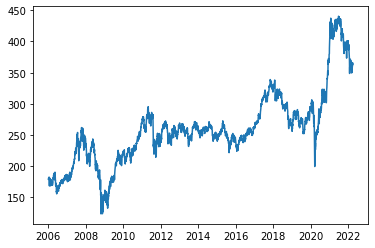

In [ ]:
plt.plot(df_kospi200['날짜'], df_kospi200['체결가'])